## Preprocess data from data/twitter_poll.csv

In [43]:
import pandas as pd
import numpy as np

In [47]:
twitter_poll_df = pd.read_csv('data/obama_aggregate.csv')
twitter_poll_df.drop(['date', 'Unnamed: 0'], axis=1, inplace=True)
twitter_poll_df.head()

,replies,retweets,favorites,approving
0,6175,13945,76360,57
1,5601,3954,24773,53
2,6368,4581,29044,53
3,3928,9502,46260,53
4,1288,6150,25260,53


## Get training and test set

In [48]:
from sklearn.model_selection import train_test_split

approve_estimate = twitter_poll_df['approving']
twitter_poll_df.drop('approving', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(twitter_poll_df, approve_estimate.values, test_size=0.2)

## Normalization
So at this point, favorites and retweets are the features, $X_{rpc}$, $X_{rtc}$, and $X_{fvc}$ that predict the approval estimate, $Y$. I want to normalize $X_{rpc}$, $X_{rtc}$, and $X_{fvc}$ since retweets are almost always less than favorites.

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)
print(y_train)

[[ 0.04769675 -0.11853793 -0.11959057]
 [-0.1398221  -0.12855053 -0.18770072]
 [ 0.16229159  0.05801237  0.25149451]
 ...
 [-0.50652561 -0.12659495 -0.17156937]
 [ 2.73338327  0.04002098  0.20470079]
 [-0.10023478 -0.07825286 -0.06108242]]
[[-5.85639313e-02 -4.56336882e-02 -9.49454532e-02]
 [ 4.26270360e+00  1.09822768e+00  1.63014889e+00]
 [-3.35675108e-01 -1.02267459e-01 -1.48012477e-01]
 ...
 [ 2.12296618e-01 -3.28832675e-02  9.01169892e-02]
 [ 2.62301642e-01 -2.74076267e-02  2.52715190e-02]
 [-9.19006142e-02 -4.26611975e-02  1.71462563e-03]]
[48 45 51 ... 47 46 49]


## Now that all the data preprocessing is done, I will do some visualization to get a sense of what regression models might make sense

Let's analyze the three different features by graphing the training data

## Feature 1, $X_{rpc}$

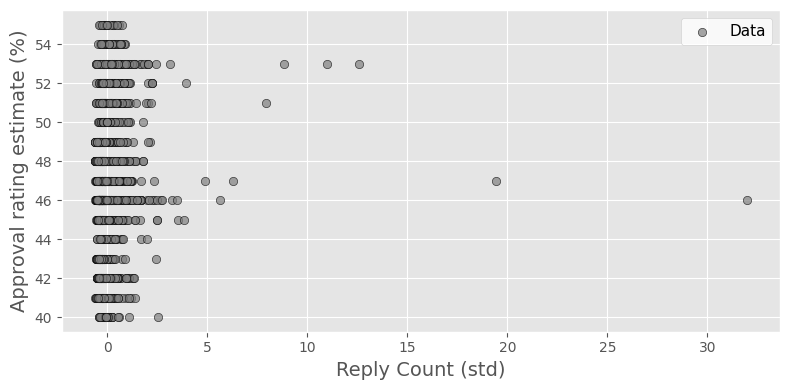

In [69]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
response = reg.predict(X_train)

ax.scatter(X_train[:,0], y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Data')
ax.set_ylabel('Approval rating estimate (%)', fontsize=14)
ax.set_xlabel('Reply Count (std)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

## Feature 2, $X_{rtc}$

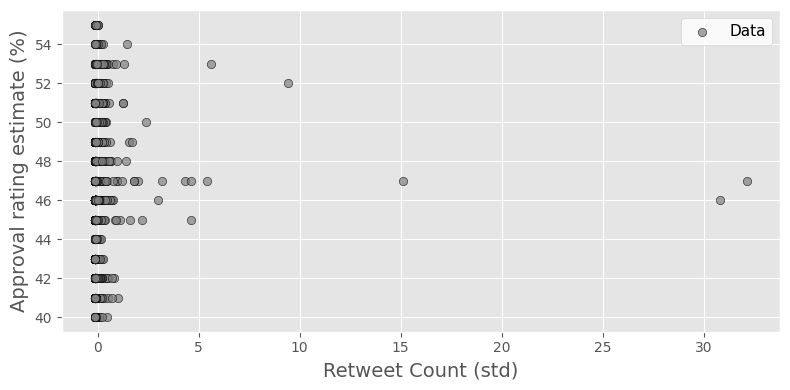

In [71]:
fig, ax = plt.subplots(figsize=(8, 4))
response = reg.predict(X_train)

ax.scatter(X_train[:,1], y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Data')
ax.set_ylabel('Approval rating estimate (%)', fontsize=14)
ax.set_xlabel('Retweet Count (std)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

## Feature 3, $X_{fvc}$

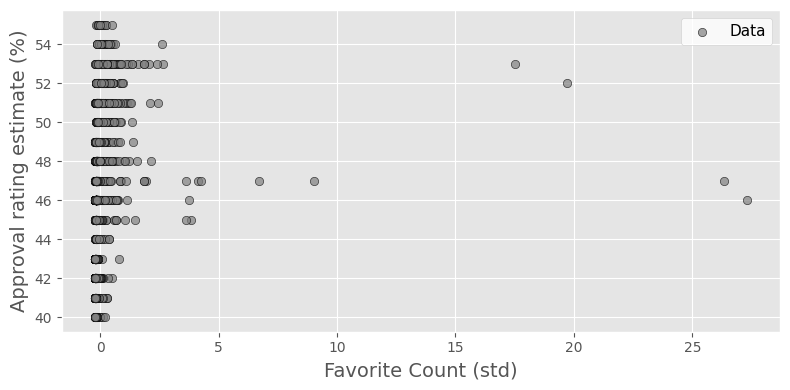

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))
response = reg.predict(X_train)

ax.scatter(X_train[:,2], y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Data')
ax.set_ylabel('Approval rating estimate (%)', fontsize=14)
ax.set_xlabel('Favorite Count (std)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

### Start running regression models on data

In [50]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

### Linear regression metrics

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Accuracy: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.31423447 -1.8604421   1.8606022 ]
Mean squared error: 10.12
Coefficient of determination: 0.06
Accuracy: 0.09


### Logistic regression metrics

In [74]:
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression()
log_regr.fit(X_train, y_train)
y_pred = log_regr.predict(X_test)

In [77]:
print('Coefficients: \n', log_regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Accuracy: %.2f' % log_regr.score(X_test, y_test))

Coefficients: 
 [[ 0.78094858  0.21545534 -1.64526257]
 [ 0.61223374  1.43692144 -4.38715533]
 [ 0.03340972  3.24919476 -4.65164376]
 [-0.28339923 -0.76125908 -5.01350683]
 [ 0.68178859 -0.7641506  -1.05414489]
 [-0.04977604  1.98678926 -0.85094225]
 [ 0.33888048  2.59461907 -1.9321316 ]
 [-0.4394013   1.74781046 -0.01033228]
 [-0.85227961 -0.21046161  2.08056501]
 [-0.822305    1.80820157 -0.03576089]
 [-0.19510314 -0.46697334  2.15610361]
 [-0.09436832 -2.88011746  3.57659143]
 [-0.12688831 -2.73189713  3.75350894]
 [ 0.3097854  -3.60592336  4.05060191]
 [-0.12292727 -1.09019439  2.74492862]
 [ 0.22940172 -0.52801493  1.21858088]]
Mean squared error: 10.12
Coefficient of determination: 0.06
Accuracy: 0.26
